In [1]:
import asyncio
asyncio.set_event_loop_policy(asyncio.WindowsSelectorEventLoopPolicy())
import backtrader as bt
import pandas as pd
import numpy as np
import random
import pytz
import time
import os
from xbbg import blp
from datetime import datetime, timedelta
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from ipywidgets import interact, Dropdown, HBox, VBox, Button, Output, Text, widgets
import sympy as sp
from sklearn.metrics import r2_score
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from IPython import get_ipython
import matplotlib.dates as mdates
from pydataquery import DataQuery
import re
import statsmodels.api as sm
from scipy.optimize import minimize
import scipy.stats as stats
import itertools
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose
import yfinance as yf
import csv
import uuid
from concurrent.futures import ThreadPoolExecutor
import warnings
from multiprocess import Pool
import time
warnings.filterwarnings('ignore')

In [2]:
isin_list = ["US105756BX78", "US105756BZ27", "US105756CA66", "US105756CC23", "US105756CG37", "US105756CE88", "US105756CK49", "US105756CF53", "US105756CH10", "US105756BW95", "US105756BY51", "US105756CB40", "US105756CJ75", "US168863DX33", "US168863CF36", "US168863EB04", "US168863DP09", "US168863DN50", "US168863DT21", "US168863DV76", "US168863DZ80", "US168863DS48", "US168863DY16", "US168863CE60", "US168863DL94", "US168863DW59", "XS2327851874", "US168863EA21", "US168863DQ81", "US168863DU93", "US195325CX13", "US195325DL65", "US195325DP79", "US195325DR36", "US195325DS19", "US195325DZ51", "US195325EF88", "US195325EG61", "US195325EL56", "US195325BK01", "US195325BM66", "US195325EA91", "US195325BR53", "US195325CU73", "US195325DQ52", "US195325DT91", "US195325EM30", "US195325DX04", "US91086QBG29", "US91087BAC46", "US91087BAE02", "US91087BAU44", "US91087BAF76", "US91087BAY65", "US91087BAH33", "US91087BAM28", "US91087BAK61", "US91087BAT70", "US91087BAR15", "US91087BAV27", "US91087BAZ31", "US91086QAV05", "US91087BAQ32", "US91086QBB32", "US91086QBE70", "US91086QBF46", "US91087BAB62", "US91087BAD29", "US91087BAG59", "US91087BAL45", "US91087BAS97", "US91087BAX82", "US91087BBA70", "US91087BAN01", "XS2280637039", "US91086QAZ19", "USP90603AN40", "US698299BF03", "US698299BK97", "US698299BX19", "USP90603AP97", "US698299BN37", "US698299BR41", "US698299BT07", "US698299AW45", "US698299BW36", "US698299BY91", "US698299BG85", "US698299BH68", "US698299BB98", "US698299BV52", "US698299BM53", "US698299BL70", "US698299BS24", "US715638DE95", "US715638BU55", "US715638DA73", "US715638DF60", "US715638DP43", "US715638DU38", "US715638EB48", "US715638DS81", "US715638BM30", "US715638DT64", "US715638EC21", "US715638DQ26", "US715638DW93", "US715638DR09", "US836205AT15", "US836205AW44", "US836205AU87", "US836205BA15", "US836205AY00", "US836205BC70", "US836205AS32", "US836205AV60", "US836205AX27", "US836205BB97", "US836205BE37", "US900123DB31", "US900123CJ75", "US900123CK49", "US900123CL22", "USM88269US88", "US900123DF45", "US900123CP36", "US900123CQ19", "US900123DH01", "US900123CT57", "US900123CY43", "US900123DJ66", "US900123DA57", "US900123DC14", "US900123DL13", "US900123DG28", "US900123DD96", "US900123AT75", "US900123DK30", "US900123DN78", "US900123AY60", "US900123BB58", "US900123BG46", "US900123BJ84", "US900123CB40", "US900123CG37", "US900123CM05", "USP3579EBK21", "USP3579EBV85", "USP3579ECB13", "USP3579ECP09", "USP3579ECF27", "USP3579ECR64", "USP3579ECH82", "USP3579ECN50", "USP3579ECU93", "USP3579ECJ49", "USP3579EAY34", "USP3579EBE60", "USP3579EBY25", "USP3579ECE51", "USP3579ECG00", "US71654QDH20", "US71654QBW15", "US71654QCB68", "US71654QDB59", "US71654QCG55", "US71654QCK67", "US71654QCP54", "US71654QDL32", "US71654QDC33", "US71654QDE98", "US71643VAB18", "US71654QDP46", "US706451BG56", "US71654QAZ54", "US71654QBR20", "US71654QCC42", "US71654QCL41", "US71654QDD16", "US71654QDF63", "US71656MAF68", "US71647NAS80", "US71647NAY58", "US71647NBH17", "US71647NBK46", "US71647NBL29", "US71645WAQ42", "US71645WAS08", "US71647NAK54", "US71647NBJ72", "US71647NAN93",
             "XS2214237807", "XS2214239506", "XS2214238441", "XS2214239175", "US040114HX11", "US040114HS26", "US040114HT09", "US040114HU71", "US040114HV54", "US040114HW38", "XS1910826996", "XS1717011982", "XS2384698994", "XS2445169985", "XS1777972511", "XS1910827887", "XS2948511949", "XS1566179039", "XS2384701020", "XS2948512913", "XS1777972941", "XS1717013095", "XS1910828182", "XS2384704800", "XS1843435840", "XS1781710543", "XS2764839945", "XS1843435766", "XS2354781614", "XS1781710626", "XS1318576086", "XS1819680288", "XS2083302419", "XS2446175577", "XS1819680528", "XS2083302500", "XS1790104530", "XS1619155564", "XS2333676133", "XS1790134362", "XS2297220423", "XS1903488572", "XS1558078736", "XS2391394348", "XS1775618439", "XS1504948776", "XS1953057061", "XS1903489463", "XS2297226545", "XS2079842642", "XS2176897754", "XS2391395154", "XS1558078496", "XS1775617464", "XS1953057491", "XS2176899701", "XS2391398174", "USP01012BX31", "USP01012CF16", "XS0146173371", "USP01012AN67", "USP01012AR71", "USP01012CA29", "USP01012CC84", "USP01012CH71", 
             "USP7808BAA54", "USP7808BAB38", "XS0505478684", "XS2079846635", "XS2297221405", 
             "USG2583XAB76", "USL21779AL44", "USL21779AJ97", "USL21779AK60", 
             "XS2322319398", "XS1729875598", "XS2419405274", "XS2322319638", "XS2322321964",
             "USN15516AB83", "USN15516AD40", "USN15516AH53","USN15516AG70","USN15516AJ10","USU1065PAA94",
             "USN15516AE23"
            ]
isin_list += ['XS2965710598','US105756CL22','US105756CM05','US168863EE43','US195325ER27','US195325EQ44','US195325EP60','US195325ES00','US25714PFB94','US25714PFC77','XS2990500766','XS2989586941','XS3010561762','US91087BBB53','US91087BBF67','US91087BBE92','US91087BBC37','US91087BBD10','US715638FD94','US715638FC12','US836205BF02','XS2917537875','US900123DQ00']
isin_list += ["US60367QAC78", "US16955EAC49", "US455780CB07", "US455780BM70", "US455780BY19", "US455780BJ42", "US455780BU96", "US455780BW52", "US455780BR67", "US455780AX45", "US455780AZ92", "US455780AT33", "US455780CV60", "US455780CY00", "US455780CQ75", "US455780CR58", "US455780CW44", "US455780DG84", "US455780CX27", "US455780DJ24", "US455780CN45", "US455780CS32", "US455780DX18", "US455780CT15", "US455780DK96", "US455780CE46", "US455780CU87", "US455780DN36", "US455780DU78", "US455780DR40", "US455780DZ65", "US455780DV51", "US455780DW35", "US455780CJ33", "US455780EA06", "US455780DS23"]
isin_list += ["XS2290957146", "US05675M2G83", "XS2408003064", "US05675M2J23", "XS2058948451", "US05675M2A14", "XS2226916216", "US05675M2D52", "XS1675862012", "US05674RAJ32", "XS2764424813", "US05675M2L78", "XS2611617700", "US05675M2K95", "XS2172965282", "US05675M2C79", "US50064FAS39", "XS2294322818", "US80413TAV17", "XS2109766472", "US80413TAQ22", "XS2159975700", "US80413TAT60", "XS1791939066", "US80413TAH23", "XS2747598444", "US80413TBF57", "XS2577135127", "US80413TBD00", "XS2747599095", "US80413TBG31", "XS2548892020", "US80413TBA60", "XS2974968161", "US80413TBK43", "XS2974969482", "US80413TBL26", "XS2288905370", "US68205LAS25", "XS2234859283", "US68205LAE39", "US718286CK14", "US718286CN52", "US718286CJ41", "US718286CR66", "US718286DC88", "US718286BW60", "US718286CW51", "US718286DG92", "US718286DA23", "US718286CT23", "US718286BD89", "US718286BG11", "US718286BB24", "US718286AY36", "XS2155352664", "US74727PBD24", "XS2822506833", "US74738PTP35", "XS2918565198", "US74738PUJ55", "XS0113419690", "US74727PAE16"]

names_list = ["BRAZIL 6 04/07/26", "BRAZIL 4 5/8 01/13/28", "BRAZIL 4 1/2 05/30/29", "BRAZIL 3 7/8 06/12/30", "BRAZIL 6 1/4 03/18/31", "BRAZIL 3 3/4 09/12/31", "BRAZIL 6 1/8 01/22/32", "BRAZIL 6 10/20/33", "BRAZIL 6 1/8 03/15/34", "BRAZIL 5 01/27/45", "BRAZIL 5 5/8 02/21/47", "BRAZIL 4 3/4 01/14/50", "BRAZIL 7 1/8 05/13/54", "CHILE 2 3/4 01/31/27", "CHILE 3.24 02/06/28", "CHILE 4.85 01/22/29", "CHILE 2.45 01/31/31", "CHILE 2.55 01/27/32", "CHILE 2.55 07/27/33", "CHILE 3 1/2 01/31/34", "CHILE 4.95 01/05/36", "CHILE 3.1 05/07/41", "CHILE 4.34 03/07/42", "CHILE 3.86 06/21/47", "CHILE 3 1/2 01/25/50", "CHILE 4 01/31/52", "CHILE 3 1/2 04/15/53", "CHILE 5.33 01/05/54", "CHILE 3.1 01/22/61", "CHILE 3 1/4 09/21/2071", "COLOM 4 1/2 01/28/26", "COLOM 3 7/8 04/25/27", "COLOM 4 1/2 03/15/29", "COLOM 3 01/30/30", "COLOM 3 1/8 04/15/31", "COLOM 3 1/4 04/22/32", "COLOM 8 04/20/33", "COLOM 7 1/2 02/02/34", "COLOM 8 11/14/35", "COLOM 7 3/8 09/18/37", "COLOM 6 1/8 01/18/41", "COLOM 4 1/8 02/22/42", "COLOM 5 5/8 02/26/44", "COLOM 5 06/15/45", "COLOM 5.2 05/15/49", "COLOM 4 1/8 05/15/51", "COLOM 8 3/4 11/14/53", "COLOM 3 7/8 02/15/61", "MEX 4 1/8 01/21/26", "MEX 4.15 03/28/27", "MEX 3 3/4 01/11/28", "MEX 5.4 02/09/28", "MEX 4 1/2 04/22/29", "MEX 5 05/07/29", "MEX 3 1/4 04/16/30", "MEX 2.659 05/24/31", "MEX 4 3/4 04/27/32", "MEX 4 7/8 05/19/33", "MEX 3 1/2 02/12/34", "MEX 6.35 02/09/35", "MEX 6 05/07/36", "MEX 6.05 01/11/40", "MEX 4.28 08/14/41", "MEX 4 3/4 03/08/44", "MEX 5.55 01/21/45", "MEX 4.6 01/23/46", "MEX 4.35 01/15/47", "MEX 4.6 02/10/48", "MEX 4 1/2 01/31/50", "MEX 5 04/27/51", "MEX 4.4 02/12/52", "MEX 6.338 05/04/53", "MEX 6.4 05/07/54", "MEX 3.771 05/24/61", "MEX 3 3/4 04/19/2071", "MEX 5 3/4 10/12/2110", "PANAMA 3 3/4 04/17/26", "PANAMA 3 7/8 03/17/28", "PANAMA 3.16 01/23/30", "PANAMA 7 1/2 03/01/31", "PANAMA 3.362 06/30/31", "PANAMA 2.252 09/29/32", "PANAMA 3.298 01/19/33", "PANAMA 6.4 02/14/35", "PANAMA 6.7 01/26/36", "PANAMA 6 7/8 01/31/36", "PANAMA 8 03/01/38", "PANAMA 4 1/2 05/15/47", "PANAMA 4 1/2 04/16/50", "PANAMA 4.3 04/29/53", "PANAMA 6.853 03/28/54", "PANAMA 4 1/2 04/01/56", "PANAMA 3.87 07/23/60", "PANAMA 4 1/2 01/19/63", "PERU 2.392 01/23/26", "PERU 4 1/8 08/25/27", "PERU 2.844 06/20/30", "PERU 2.783 01/23/31", "PERU 1.862 12/01/32", "PERU 3 01/15/34", "PERU 5 3/8 02/08/35", "PERU 3.3 03/11/41", "PERU 5 5/8 11/18/50", "PERU 3.55 03/10/51", "PERU 5 7/8 08/08/54", "PERU 2.78 12/01/60", "PERU 3.6 01/15/2072", "PERU 3.23 07/28/2121", "SOAF 4 7/8 04/14/26", "SOAF 4.85 09/27/27", "SOAF 4.3 10/12/28", "SOAF 4.85 09/30/29", "SOAF 5 7/8 06/22/30", "SOAF 5 7/8 04/20/32", "SOAF 5 3/8 07/24/44", "SOAF 5 10/12/46", "SOAF 5.65 09/27/47", "SOAF 5 3/4 09/30/49", "SOAF 7.3 04/20/52", "TURKEY 4 3/4 01/26/26", "TURKEY 4 1/4 04/14/26", "TURKEY 4 7/8 10/09/26", "TURKEY 6 03/25/27", "TURKEY 8.6 09/24/27", "TURKEY 9 7/8 01/15/28", "TURKEY 5 1/8 02/17/28", "TURKEY 6 1/8 10/24/28", "TURKEY 9 3/8 03/14/29", "TURKEY 7 5/8 04/26/29", "TURKEY 5 1/4 03/13/30", "TURKEY 9 1/8 07/13/30", "TURKEY 5.95 01/15/31", "TURKEY 5 7/8 06/26/31", "TURKEY 7 1/8 07/17/32", "TURKEY 9 3/8 01/19/33", "TURKEY 6 1/2 09/20/33", "TURKEY 8 02/14/34", "TURKEY 7 5/8 05/15/34", "TURKEY 6 1/2 01/03/35", "TURKEY 6 7/8 03/17/36", "TURKEY 7 1/4 03/05/38", "TURKEY 6 3/4 05/30/40", "TURKEY 6 01/14/41", "TURKEY 4 7/8 04/16/43", "TURKEY 6 5/8 02/17/45", "TURKEY 5 3/4 05/11/47", "DOMREP 6 7/8 01/29/26", "DOMREP 5.95 01/25/27", "DOMREP 6 07/19/28", "DOMREP 5 1/2 02/22/29", "DOMREP 4 1/2 01/30/30", "DOMREP 7.05 02/03/31", "DOMREP 4 7/8 09/23/32", "DOMREP 6 02/22/33", "DOMREP 6.6 06/01/36", "DOMREP 5.3 01/21/41", "DOMREP 7.45 04/30/44", "DOMREP 6.85 01/27/45", "DOMREP 6 1/2 02/15/48", "DOMREP 6.4 06/05/49", "DOMREP 5 7/8 01/30/60", "PEMEX 6 7/8 10/16/25", "PEMEX 4 1/2 01/23/26", "PEMEX 6 7/8 08/04/26", "PEMEX 6.49 01/23/27", "PEMEX 6 1/2 03/13/27", "PEMEX 5.35 02/12/28", "PEMEX 6 1/2 01/23/29", "PEMEX 8 3/4 06/02/29", "PEMEX 6.84 01/23/30", "PEMEX 5.95 01/28/31", "PEMEX 6.7 02/16/32", "PEMEX 10 02/07/33", "PEMEX 6 5/8 06/15/35", "PEMEX 6 1/2 06/02/41", "PEMEX 6 3/8 01/23/45", "PEMEX 6 3/4 09/21/47", "PEMEX 6.35 02/12/48", "PEMEX 7.69 01/23/50", "PEMEX 6.95 01/28/60", "PEMEX 6 5/8 PERP", "PETBRA 7 3/8 01/17/27", "PETBRA 5.999 01/27/28", "PETBRA 5.6 01/03/31", "PETBRA 6 1/2 07/03/33", "PETBRA 6 01/13/35", "PETBRA 6 7/8 01/20/40", "PETBRA 6 3/4 01/27/41", "PETBRA 7 1/4 03/17/44", "PETBRA 5 1/2 06/10/51", "PETBRA 6.85 06/05/2115",
             "ECUA 6.9 07/31/30", "ECUA 0 07/31/30", "ECUA 6.9 07/31/35", "ECUA 5 07/31/40", "ARGENT 1 07/09/29", "ARGENT 0 3/4 07/09/30", "ARGENT 4 1/8 07/09/35", "ARGENT 5 01/09/38", "ARGENT 3 1/2 07/09/41", "ARGENT 4 1/8 07/09/46", "NGERIA 7 5/8 11/21/25", "NGERIA 6 1/2 11/28/27", "NGERIA 6 1/8 09/28/28", "NGERIA 8 3/8 03/24/29", "NGERIA 7.143 02/23/30", "NGERIA 8.747 01/21/31", "NGERIA 9 5/8 06/09/31", "NGERIA 7 7/8 02/16/32", "NGERIA 7 3/8 09/28/33", "NGERIA 10 3/8 12/09/34", "NGERIA 7.696 02/23/38", "NGERIA 7 5/8 11/28/47", "NGERIA 9.248 01/21/49", "NGERIA 8 1/4 09/28/51", "KENINT 7 05/22/27", "KENINT 7 1/4 02/28/28", "KENINT 9 3/4 02/16/31", "KENINT 8 05/22/32", "KENINT 6.3 01/23/34", "KENINT 8 1/4 02/28/48", "ANGOL 9 1/2 11/12/25", "ANGOL 8 1/4 05/09/28", "ANGOL 8 11/26/29", "ANGOL 8 3/4 04/14/32", "ANGOL 9 3/8 05/08/48", "ANGOL 9 1/8 11/26/49", "SENEGL 4 3/4 03/13/28", "SENEGL 6 1/4 05/23/33", "SENEGL 5 3/8 06/08/37", "SENEGL 6 3/4 03/13/48", "EGYPT 3 7/8 02/16/26", "EGYPT 7 1/8 11/10/26", "EGYPT 7 1/2 01/31/27", "EGYPT 5.8 09/30/27", "EGYPT 6.588 02/21/28", "EGYPT 7 11/10/28", "EGYPT 7.6003 03/01/29", "EGYPT 7 5/8 11/10/30", "EGYPT 5 7/8 02/16/31", "EGYPT 7.0529 01/15/32", "EGYPT 7 5/8 05/29/32", "EGYPT 7.3 09/30/33", "EGYPT 8 1/2 01/31/47", "EGYPT 7.903 02/21/48", "EGYPT 8.7002 03/01/49", "EGYPT 8 7/8 05/29/50", "EGYPT 8 3/4 09/30/51", "ELSALV 8 5/8 02/28/29", "ELSALV 9 1/4 04/17/30", "ELSALV 8 1/4 04/10/32", "ELSALV 7.65 06/15/35", "ELSALV 7 5/8 02/01/41", "ELSALV 7.1246 01/20/50", "ELSALV 9 1/2 07/15/52", "ELSALV 9.65 11/21/54", 
             "PETRPE 4 3/4 06/19/32", "PETRPE 5 5/8 06/19/47", "EGYPT 6 7/8 04/30/40", "EGYPT 8.15 11/20/59", "EGYPT 7 1/2 02/16/61", 
             "CSNABZ 6 3/4 01/28/28", "CSNABZ 8 7/8 12/05/30", "CSNABZ 4 5/8 06/10/31", "CSNABZ 5 7/8 04/08/32",
             "PKSTAN 6 04/08/26", "PKSTAN 6 7/8 12/05/27", "PKSTAN 7.95 01/31/29", "PKSTAN 7 3/8 04/08/31", "PKSTAN 8 7/8 04/08/51",
             "BRASKM 4.5 01/10/28", "BRASKM 4.5 01/31/30","BRASKM 8.5 01/12/31","BRASKM 7.25 02/13/33","BRASKM 8 10/15/34","BRASKM 7.125 07/22/41", "BRASKM 5.875 01/31/50",
             ]
names_list += ['ANGOL 10.95 12/27/30', 'BRAZIL 6 5/8 03/15/35', 'BRAZIL 5 1/2 11/06/30', 'CHILE 5.65 01/13/37', 'COLOM 7 3/8 04/25/30', 'COLOM 8 3/8 11/07/54', 'COLOM 7 3/4 11/07/36', 'COLOM 8 1/2 04/25/35', 'DOMREP 6.95 03/15/37', 'DOMREP 7.15 02/24/55', 'EGYPT 9.45 02/04/33', 'EGYPT 8 5/8 02/04/30', 'KENINT 9 1/2 03/05/36', 'MEX 6 05/13/30', 'MEX 6 5/8 01/29/38', 'MEX 5.85 07/02/32', 'MEX 6 7/8 05/13/37', 'MEX 7 3/8 05/13/55', 'PERU 6.2 06/30/55', 'PERU 5 1/2 03/30/36', 'SOAF 7.1 11/19/36', 'SOAF 7.95 11/19/54', 'TURKEY 7 1/4 05/29/32']
names_list += ["CHINA 1 3/4 10/26/31", "CHINA 1.2 10/21/30", "INDON 4 3/4 07/18/47", "INDON 4 5/8 04/15/43", "INDON 5 1/4 01/08/47", "INDON 5 1/4 01/17/42", "INDON 5 1/8 01/15/45", "INDON 5.95 01/08/46", "INDON 6 3/4 01/15/44", "INDON 6 5/8 02/17/37", "INDON 7 3/4 01/17/38", "INDON 8 1/2 10/12/35", "INDON 1.85 03/12/31", "INDON 2.15 07/28/31", "INDON 2.85 02/14/30", "INDON 3 1/2 02/14/50", "INDON 3.05 03/12/51", "INDON 3.2 09/23/61", "INDON 3.35 03/12/2071", "INDON 3.55 03/31/32", "INDON 3.7 10/30/49", "INDON 3.85 10/15/30", "INDON 4 3/4 09/10/34", "INDON 4.2 10/15/50", "INDON 4.3 03/31/52", "INDON 4.35 01/11/48", "INDON 4.45 04/15/70", "INDON 4.65 09/20/32", "INDON 4.7 02/10/34", "INDON 4.85 01/11/33", "INDON 5 1/4 01/15/30", "INDON 5.1 02/10/54", "INDON 5.15 09/10/54", "INDON 5.35 02/11/49", "INDON 5.6 01/15/35", "INDON 5.65 01/11/53"]
names_list += ["BHRAIN 5 1/4 01/25/33", "BHRAIN 5 1/4 01/25/33", "BHRAIN 5 5/8 05/18/34", "BHRAIN 5 5/8 05/18/34", "BHRAIN 5 5/8 09/30/31", "BHRAIN 5 5/8 09/30/31", "BHRAIN 5.45 09/16/32", "BHRAIN 5.45 09/16/32", "BHRAIN 6 3/4 09/20/29", "BHRAIN 6 3/4 09/20/29", "BHRAIN 7 1/2 02/12/36", "BHRAIN 7 1/2 02/12/36", "BHRAIN 7 3/4 04/18/35", "BHRAIN 7 3/4 04/18/35", "BHRAIN 7 3/8 05/14/30", "BHRAIN 7 3/8 05/14/30", "KOREA 1 09/16/30", "KSA 2 1/4 02/02/33", "KSA 2 1/4 02/02/33", "KSA 2 3/4 02/03/32", "KSA 2 3/4 02/03/32", "KSA 3 1/4 10/22/30", "KSA 3 1/4 10/22/30", "KSA 4 1/2 04/17/30", "KSA 4 1/2 04/17/30", "KSA 4 3/4 01/16/30", "KSA 4 3/4 01/16/30", "KSA 4 7/8 07/18/33", "KSA 4 7/8 07/18/33", "KSA 5 01/16/34", "KSA 5 01/16/34", "KSA 5 1/2 10/25/32", "KSA 5 1/2 10/25/32", "KSA 5 3/8 01/13/31", "KSA 5 3/8 01/13/31", "KSA 5 5/8 01/13/35", "KSA 5 5/8 01/13/35", "OMAN 6 1/4 01/25/31", "OMAN 6 1/4 01/25/31", "OMAN 7 3/8 10/28/32", "OMAN 7 3/8 10/28/32", "PHILIP 1.648 06/10/31", "PHILIP 1.95 01/06/32", "PHILIP 2.457 05/05/30", "PHILIP 3.556 09/29/32", "PHILIP 4 3/4 03/05/35", "PHILIP 5 01/13/37", "PHILIP 5 07/17/33", "PHILIP 5 1/2 02/04/35", "PHILIP 5 1/4 05/14/34", "PHILIP 5.609 04/13/33", "PHILIP 6 3/8 01/15/32", "PHILIP 6 3/8 10/23/34", "PHILIP 7 3/4 01/14/31", "PHILIP 9 1/2 02/02/30", "QATAR 3 3/4 04/16/30", "QATAR 3 3/4 04/16/30", "QATAR 4 3/4 05/29/34", "QATAR 4 3/4 05/29/34", "QATAR 4 7/8 02/27/35", "QATAR 4 7/8 02/27/35", "QATAR 9 3/4 06/15/30", "QATAR 9 3/4 06/15/30"]

new_dict = dict(zip(names_list, isin_list))
all_dict = {'ECUA 6.9 07/31/30': 'XS2214237807', 'ECUA 0 07/31/30': 'XS2214239506', 'ECUA 6.9 07/31/35': 'XS2214238441', 'ECUA 5 07/31/40': 'XS2214239175', 'ARGENT 1 07/09/29': 'US040114HX11', 'ARGENT 0 3/4 07/09/30': 'US040114HS26', 'ARGENT 4 1/8 07/09/35': 'US040114HT09', 'ARGENT 5 01/09/38': 'US040114HU71', 'ARGENT 3 1/2 07/09/41': 'US040114HV54', 'ARGENT 4 1/8 07/09/46': 'US040114HW38', 'NGERIA 7 5/8 11/21/25': 'XS1910826996', 'NGERIA 6 1/2 11/28/27': 'XS1717011982', 'NGERIA 6 1/8 09/28/28': 'XS2384698994', 'NGERIA 8 3/8 03/24/29': 'XS2445169985', 'NGERIA 7.143 02/23/30': 'XS1777972511', 'NGERIA 8.747 01/21/31': 'XS1910827887', 'NGERIA 9 5/8 06/09/31': 'XS2948511949', 'NGERIA 7 7/8 02/16/32': 'XS1566179039', 'NGERIA 7 3/8 09/28/33': 'XS2384701020', 'NGERIA 10 3/8 12/09/34': 'XS2948512913', 'NGERIA 7.696 02/23/38': 'XS1777972941', 'NGERIA 7 5/8 11/28/47': 'XS1717013095', 'NGERIA 9.248 01/21/49': 'XS1910828182', 'NGERIA 8 1/4 09/28/51': 'XS2384704800', 'KENINT 7 05/22/27': 'XS1843435840', 'KENINT 7 1/4 02/28/28': 'XS1781710543', 'KENINT 9 3/4 02/16/31': 'XS2764839945', 'KENINT 8 05/22/32': 'XS1843435766', 'KENINT 6.3 01/23/34': 'XS2354781614', 'KENINT 8 1/4 02/28/48': 'XS1781710626', 'ANGOL 9 1/2 11/12/25': 'XS1318576086', 'ANGOL 8 1/4 05/09/28': 'XS1819680288', 'ANGOL 8 11/26/29': 'XS2083302419', 'ANGOL 8 3/4 04/14/32': 'XS2446175577', 'ANGOL 9 3/8 05/08/48': 'XS1819680528', 'ANGOL 9 1/8 11/26/49': 'XS2083302500', 'SENEGL 4 3/4 03/13/28': 'XS1790104530', 'SENEGL 6 1/4 05/23/33': 'XS1619155564', 'SENEGL 5 3/8 06/08/37': 'XS2333676133', 'SENEGL 6 3/4 03/13/48': 'XS1790134362', 'ELSALV 8 5/8 02/28/29': 'USP01012BX31', 'ELSALV 9 1/4 04/17/30': 'USP01012CF16', 'ELSALV 8 1/4 04/10/32': 'XS0146173371', 'ELSALV 7.65 06/15/35': 'USP01012AN67', 'ELSALV 7 5/8 02/01/41': 'USP01012AR71', 'ELSALV 7.1246 01/20/50': 'USP01012CA29', 'ELSALV 9 1/2 07/15/52': 'USP01012CC84', 'ELSALV 9.65 11/21/54': 'USP01012CH71', 'EGYPT 3 7/8 02/16/26': 'XS2297220423', 'EGYPT 7 1/8 11/10/26': 'XS1903488572', 'EGYPT 7 1/2 01/31/27': 'XS1558078736', 'EGYPT 5.8 09/30/27': 'XS2391394348', 'EGYPT 6.588 02/21/28': 'XS1775618439', 'EGYPT 7 11/10/28': 'XS1504948776', 'EGYPT 7.6003 03/01/29': 'XS1953057061', 'EGYPT 7 5/8 11/10/30': 'XS1903489463', 'EGYPT 5 7/8 02/16/31': 'XS2297226545', 'EGYPT 7.0529 01/15/32': 'XS2079842642', 'EGYPT 7 5/8 05/29/32': 'XS2176897754', 'EGYPT 7.3 09/30/33': 'XS2391395154', 'EGYPT 6 7/8 04/30/40': 'XS0505478684', 'EGYPT 8 1/2 01/31/47': 'XS1558078496', 'EGYPT 7.903 02/21/48': 'XS1775617464', 'EGYPT 8.7002 03/01/49': 'XS1953057491', 'EGYPT 8 7/8 05/29/50': 'XS2176899701', 'EGYPT 8 3/4 09/30/51': 'XS2391398174', 'EGYPT 8.15 11/20/59': 'XS2079846635', 'EGYPT 7 1/2 02/16/61': 'XS2297221405', 'PEMEX 6 7/8 10/16/25': 'US71654QDH20', 'PEMEX 4 1/2 01/23/26': 'US71654QBW15', 'PEMEX 6 7/8 08/04/26': 'US71654QCB68', 'PEMEX 6.49 01/23/27': 'US71654QDB59', 'PEMEX 6 1/2 03/13/27': 'US71654QCG55', 'PEMEX 5.35 02/12/28': 'US71654QCK67', 'PEMEX 6 1/2 01/23/29': 'US71654QCP54', 'PEMEX 8 3/4 06/02/29': 'US71654QDL32', 'PEMEX 6.84 01/23/30': 'US71654QDC33', 'PEMEX 5.95 01/28/31': 'US71654QDE98', 'PEMEX 6.7 02/16/32': 'US71643VAB18', 'PEMEX 10 02/07/33': 'US71654QDP46', 'PEMEX 6 5/8 06/15/35': 'US706451BG56', 'PEMEX 6 1/2 06/02/41': 'US71654QAZ54', 'PEMEX 6 3/8 01/23/45': 'US71654QBR20', 'PEMEX 6 3/4 09/21/47': 'US71654QCC42', 'PEMEX 6.35 02/12/48': 'US71654QCL41', 'PEMEX 7.69 01/23/50': 'US71654QDD16', 'PEMEX 6.95 01/28/60': 'US71654QDF63', 'PEMEX 6 5/8 PERP': 'US71656MAF68', 'PETRPE 4 3/4 06/19/32': 'USP7808BAA54', 'PETRPE 5 5/8 06/19/47': 'USP7808BAB38', 'CSNABZ 6 3/4 01/28/28': 'USG2583XAB76', 'CSNABZ 8 7/8 12/05/30': 'USL21779AL44', 'CSNABZ 4 5/8 06/10/31': 'USL21779AJ97', 'CSNABZ 5 7/8 04/08/32': 'USL21779AK60', 'PKSTAN 6 04/08/26': 'XS2322319398', 'PKSTAN 6 7/8 12/05/27': 'XS1729875598', 'PKSTAN 7.95 01/31/29': 'XS2419405274', 'PKSTAN 7 3/8 04/08/31': 'XS2322319638', 'PKSTAN 8 7/8 04/08/51': 'XS2322321964',
'ANGOL 10.95 12/27/30': 'XS2214237807','EGYPT 9.45 02/04/33': 'XS2214239506','EGYPT 8 5/8 02/04/30': 'XS2214238441','ELSALV 9.65 11/21/54': 'XS2214239175','KENINT 9 1/2 03/05/36': 'US040114HX11','NGERIA 10 3/8 12/09/34': 'US040114HS26','NGERIA 9 5/8 06/09/31': 'US040114HT09','BRASKM 4.5 01/10/28': 'USN15516AB83','BRASKM 4.5 01/31/30': 'USN15516AD40','BRASKM 8.5 01/12/31': 'USN15516AH53','BRASKM 7.25 02/13/33': 'USN15516AG70','BRASKM 8 10/15/34': 'USN15516AJ10','BRASKM 7.125 07/22/41': 'USU1065PAA94','BRASKM 5.875 01/31/50': 'USN15516AE23',
'PETBRA 7 3/8 01/17/27': 'US71647NAS80', 'PETBRA 5.999 01/27/28': 'US71647NAY58', 'PETBRA 5.6 01/03/31': 'US71647NBH17', 'PETBRA 6 1/2 07/03/33': 'US71647NBK46', 'PETBRA 6 01/13/35': 'US71647NBL29', 'PETBRA 6 7/8 01/20/40': 'US71645WAQ42', 'PETBRA 6 3/4 01/27/41': 'US71645WAS08', 'PETBRA 7 1/4 03/17/44': 'US71647NAK54', 'PETBRA 5 1/2 06/10/51': 'US71647NBJ72', 'PETBRA 6.85 06/05/2115': 'US71647NAN93', }

#Making Manual Adj. for Perp Bond of PEMEX
# names_list[names_list.index("PEMEX 6 5/8 PERP")] = "PEMEX 6 5/8 01/01/2999"

all_dict = {**all_dict, **new_dict}
names_list = list(all_dict.keys())
names_list = ["PEMEX 6 5/8 01/01/2199" if item == "PEMEX 6 5/8 PERP" else item for item in names_list]
isin_list = list(all_dict.values())

all_dict = dict(zip(names_list, isin_list))

##################  Change here only
mat_date = [item.split(" ")[-1] for item in names_list]
names_list = [item.split(' ',1)[0] + ' ' + item.rsplit(' ',1)[0].split(' ',1)[1] + '% due ' + item.rsplit('/',1)[-1] for item in names_list]
mat_dict = dict(zip(names_list, mat_date))

fields = [
          ["DB(SAGE,INSTRUMENT,id_isin,", ",StatDurSprdEffWrst)"],
          ["DB(SAGE,INSTRUMENT,id_isin,", ",StatCdsPESpreadAsk)"],
          ["DB(SAGE,INSTRUMENT,id_isin,", ",StatCdsPESpreadBid)"],
          ["DB(SAGE,INSTRUMENT,id_isin,", ",StatMidPrice)"],         
          ["DB(SAGE,INSTRUMENT,id_isin,", ",AM_IDX_TOT)"],
          # ["DB(SAGE,INSTRUMENT,id_isin,", ",StatRtAskStripSolMid)*100"],
          ["DB(SAGE,INSTRUMENT,id_isin,", ",StatCdsBasis)"],
          # ["DB(SAGE,INSTRUMENT,id_isin,", ",StatDurSprdEffWrst)"],
          ["DB(SAGE,INSTRUMENT,id_isin,", ",CMStatCdsPESpreadAskIsrDistance)"],
         ]
          
field_names = ['Duration', 
               'PECS Ask', 'PECS Bid', 
               'Price','TR','Basis','Rich/Cheap Model Sprd to Curve',]

dq_list = []
full_names = []

for i in range(len(isin_list)):
    for j in range(len(fields)):
        dq_list = dq_list + [fields[j][0] + isin_list[i] + fields[j][1]]
        full_names = full_names + [names_list[i] + ' ' + field_names[j]]

labels = dict(zip(full_names, dq_list))

################################################# PA Data Only
new_labels = {}
for key, val in labels.items():
    if key.split(" ")[0] == "PANAMA":
        new_labels[key] = val

cds_dict = {"PA Par 5Y CDS Sprd": "DB(JPMR-EMCREDIT,CDS-Sovereign,PA/CDS/USD/5y/ParSpread)",
"PA Dur": "DB(JPMR-EMCREDIT,CDS-Sovereign,PA/CDS/USD/5y/Duration100)",
"PA Uf 100": "DB(JPMR-EMCREDIT,CDS-Sovereign,PA/CDS/USD/5y/Upfront100)",}

d = {"Hot Run | 5 year note | Current | Mid Price" : "DB(FHR,N5,MIDPRC)", "Hot Run | 5 year note | Current | Coupon" : "DB(FHR,N5,COUPON)", "Hot Run | 7 year note | Current | Mid Price" : "DB(FHR,N7,MIDPRC)", "Hot Run | 7 year note | Current | Coupon" : "DB(FHR,N7,COUPON)", "Hot Run | 10 year note | Current | Mid Price" : "DB(FHR,N10,MIDPRC)", "Hot Run | 10 year note | Current | Coupon" : "DB(FHR,N10,COUPON)", "Hot Run | 20 year bond | Current | Mid Price" : "DB(FHR,B20,MIDPRC)", "Hot Run | 20 year bond | Current | Coupon" : "DB(FHR,B20,COUPON)", "Hot Run | 30 year bond | Current | Mid Price" : "DB(FHR,B30,MIDPRC)", "Hot Run | 30 year bond | Current | Coupon" : "DB(FHR,B30,COUPON)", "Hot Run | 5 year note | Current | Modified Duration" : "DB(FHR,N5,MODDUR)", "Hot Run | 7 year note | Current | Modified Duration" : "DB(FHR,N7,MODDUR)", "Hot Run | 10 year note | Current | Modified Duration" : "DB(FHR,N10,MODDUR)", "Hot Run | 20 year bond | Current | Modified Duration" : "DB(FHR,B20,MODDUR)", "Hot Run | 30 year bond | Current | Modified Duration" : "DB(FHR,B30,MODDUR)"
    }
new_d = {}
for key, val in d.items():
    new_d["CT" + key.split(" | ")[1].replace(" year note","").replace(" year bond","") + "_" + key.split(" | ")[-1].\
        replace("Mid Price","PX")] = val

################################################# PA Data Only
labels = {**new_labels, **cds_dict, **new_d}

labels["Fed Fund"] = "FF"

# all_start_date = str((datetime.now()-timedelta(days=365*15)).strftime("%Y-%m-%d"))

# dq = DataQuery(
# client_id='jbAIMF2Tkp0JO3sc',
# client_secret='d7qfzgt55pddjs352sgxosFyI4t2eja07k7opbi6wg9oqjc1OjkdAksn1btmnugeMjchcx2vwTsJupw',
# )

# job = dq.create_job(expressions = list(labels.values()))
# dq.start_date = all_start_date
# var = job.execute()
# df = job.to_pivot_table()
# df = df.T
# df.index = pd.to_datetime(df.index, format='%Y%m%d').date
# df.index.name = 'Date'

# df.rename(columns={v:k for k, v in labels.items()},inplace=True)
# df.columns.name = None
# clear_output(wait=False)
# df = df.dropna(how='all')
# df = df.dropna(axis=1, how='all')

# dq = df.copy()
# dq.to_parquet("PA - DQ Data.parquet")

In [3]:
dq = pd.read_parquet("PA - DQ Data.parquet")
# dq[[col for col in dq.columns if 'Rich/Cheap' in col]].plot(legend=False)
dq = dq.drop([col for col in dq.columns if 'Rich/Cheap' in col], axis=1)
pecs_cols = [col for col in dq.columns if col.endswith("PECS Bid")]
for item in pecs_cols:
    if item.replace("PECS Bid","PECS Ask") in dq.columns:
        dq[item.replace(" Bid","")] = 0.5*(dq[item] + dq[item.replace("PECS Bid","PECS Ask")])
dq = dq[[col for col in dq.columns if not(col.endswith("PECS Bid")) and not col.endswith("PECS Ask")]].copy()

bonds = [col.replace(" Basis","") for col in dq.columns if col.endswith("Basis")]
bbg = dq[[col for col in dq.columns if col.startswith("CT")]].copy()
bbg.columns = bbg.columns.str.replace("Modified Duration","Dur").str.replace('Coupon','Cpn')
dq = dq[[col for col in dq.columns if not col.startswith("CT")]].copy()
dq.columns = dq.columns.str.replace(dq.columns[2], f"{dq.columns[2].split(" ")[0]}" + " CDS PX")
dq[dq.columns[2]] = 100 - dq[dq.columns[2]]
cds = dq.iloc[:,:3].copy()
cds.columns = ["CDS 5Y Dur","CDS 5Y Par Sprd","CDS 5Y PX"]
original_cds = cds.copy()

dq = dq.iloc[:,3:].copy()
dur = bbg[[col for col in bbg.columns if col.endswith("_Dur")]].copy()

for item in bonds:
    dq[f"{item} Basis 1Y ZScore"] = (dq[f"{item} Basis"] - dq[f"{item} Basis"].rolling(252,min_periods=200).\
        mean())/dq[f"{item} Basis"].rolling(252,min_periods=200).std()

# for item in bonds:
# bond = bonds[1]
bond = "PANAMA 6.7% due 36"

df = pd.concat([dq[[col for col in dq.columns if col.startswith(bond)]].\
    dropna(how="all"), dur],axis=1).dropna().sort_index()


cts = ["5", "7", "10", "20", "30"]
hedge_cols = [f"CT{ct}_Dur" for ct in cts]
X = df[hedge_cols].to_numpy()
y = df[f"{bond} Duration"].to_numpy()
diff = np.abs(X - y[:, None])
idx = diff.argmin(axis=1)
df["Min_Dist"] = diff[np.arange(len(df)), idx]
df["Rates_Hg"] = df[hedge_cols].columns[idx]
df["Rates_Hg"] = [item.replace("_Dur","") for item in df["Rates_Hg"]]
df = df.drop(hedge_cols+["Min_Dist"],axis=1)

df = pd.concat([df,bbg],axis=1).sort_index().copy()

# bond_dur = pd.read_excel("PA Bond Dur.xlsx",index_col=0,parse_dates=True).iloc[:,[1]]
bond_dur = pd.read_excel("PA Bond Dur due 36.xlsx",index_col=0,parse_dates=True).iloc[:,[1]]

bond_dur = bond_dur[bond_dur.index>=pd.to_datetime(df.index[0])]
bond_dur.index = bond_dur.index.date
bond_dur.columns = [f"PANAMA 6.7% due 36 Rates Duration"]
df1 = pd.concat([bond_dur, df, dq[["Fed Fund"]]],axis=1).sort_index().copy()
df1.columns = df1.columns.str.replace(bond ,"Bond")

In [4]:
l = list(range(0,100,5))[1:]+[100]
l = [item/100 for item in l]
all_dict = {}
sr_list = []
pnl_list = []
hit_list = []

for rates_hg_frac in l:

    bt_df = pd.concat([original_cds, df1], axis=1).sort_index().dropna(subset=["Bond Price"]).dropna()
    bt_df["CDS Cpn"] = [1] * len(bt_df)
    bt_df["Bond Cpn"] = [4.3] * len(bt_df)
    bt_df["Long Fin. Cost"] = bt_df["Fed Fund"] + 0.25
    bt_df["Short Fin. Benefit"] = bt_df["Fed Fund"] - 0.25
    bt_df = bt_df.drop(["Fed Fund"],axis=1)
    
    bt_df = bt_df[["CDS 5Y Dur","CDS 5Y PX","CDS Cpn","Bond Duration","Bond Rates Duration","Bond Price","Bond Cpn",
             "Bond Basis 1Y ZScore","Rates_Hg","CT5_Dur","CT5_PX","CT5_Cpn","CT7_Dur","CT7_PX","CT7_Cpn",
             "CT10_Dur","CT10_PX","CT10_Cpn","CT20_Dur","CT20_PX","CT20_Cpn",
             "CT30_Dur","CT30_PX","CT30_Cpn","Long Fin. Cost","Short Fin. Benefit"]].copy()
    
    cds_notional = 10**7
    
    bt_df["CDS Notional"] = [cds_notional] * len(bt_df)
    bt_df["Bond Notional"] = cds_notional*bt_df["CDS 5Y Dur"] / bt_df["Bond Duration"]
    bt_df["Rates Notional"] = bt_df.apply(lambda row: row["Bond Notional"]*row["Bond Rates Duration"]*rates_hg_frac/row[row["Rates_Hg"]+"_Dur"],axis=1)
    bt_df = bt_df[[col for col in bt_df.columns if not("Dur" in col or "Duration" in col)]]
    bt_df["volume"] = [0]*len(bt_df)
    bt_df.columns = bt_df.columns.str.replace("Bond Basis 1Y ZScore","signal")
    bt_df.index = pd.to_datetime(bt_df.index)
    
    cds = bt_df[["CDS 5Y PX","CDS Cpn","CDS Notional","signal",'volume']].copy()
    bond = bt_df[["Bond Price","Bond Cpn","Bond Notional","signal","Long Fin. Cost","Short Fin. Benefit",'volume']].copy()
    rates = bt_df[["Rates_Hg","signal","CT5_PX","CT5_Cpn","CT7_PX","CT7_Cpn","CT10_PX","CT10_Cpn","CT20_PX","CT20_Cpn",
                   "CT30_PX","CT30_Cpn","Long Fin. Cost","Short Fin. Benefit","Rates Notional",'volume']].copy()
    
    cds["signal"] *= -1
    rates["signal"] *= -1  ############ when buy basis => sell cds px and buy bond px and sell rates px
    
    ######################################################################################################### NEW BLOCK
    
    ############################# CDS
    class CDSMyData(bt.feeds.PandasData):
        lines = ('close', 'cdx_cpn', 'cdx_not', 'signal')
        params = (('close', 'CDS 5Y PX'), ('cdx_cpn', 'CDS Cpn'), 
                  ('cdx_not', 'CDS Notional'), ('signal', 'signal'))
    
    class CDSFixedComm(bt.CommInfoBase):
        params = (('commission', 0), ('stocklike', True), ('commtype', bt.CommInfoBase.COMM_FIXED),)
        def _getcommission(self, size, price, pseudoexec):
            return self.p.commission
    
    class CDSTStrategy(bt.Strategy):
        params = dict(cheat_on_close=True, entry_zscore = 0, exit_zscore = 0, product = 'Untitled')
        
        def __init__(self):
            self.portfolio_values = []
            self.entry_date = None
            self.daily_pnl = []
            self.roll_trades = []
            self.carry = []
            self.roll_carry = []
            
            self.funding = []
            self.funding_carry = []
            self.funding_direction = None
            self.entry_bar_funding = None
            
            self.trade_direction = []
            
            self.scatter_plot_trade_pnl = []
            self.scatter_plot_trade_init_len = None
            
            self.carry_direction = 0
            self.logs = []
    
        def log(self, txt):
            dt = self.datas[0].datetime.datetime(0)
            print(f'{dt} - {txt}')
            self.logs.append([dt.isoformat(), txt])
    
        def notify_trade(self, trade):            
            if trade.isclosed:            
                current_date = self.datas[0].datetime.datetime(-1)
                
                self.trade_direction.append((current_date, "Short Sprd Basis" if self.funding_direction=="Long" else "Long Sprd Basis")) 
                #### Y determines the long/short direction
                
                ######################################## Calculating carry for all trades
                self.daily_pnl.append((current_date, trade.pnlcomm))
    
                if self.carry_direction > 0 : 
                    self.carry.append((current_date, (current_date.date()-self.entry_date.\
                                                      date()).days*(1/360)*self.datas[0].cdx_cpn[0]*(1/100)*self.datas[0].cdx_not[0]))
                elif self.carry_direction < 0 :
                    self.carry.append((current_date, -1*(current_date.date()-self.entry_date.\
                                                     date()).days*(1/360)*self.datas[0].cdx_cpn[0]*(1/100)*self.datas[0].cdx_not[0]))
                
                ######################################
    
                
                p1 = [datetime(current_date.year, 3, 20), datetime(current_date.year, 3, 30)]
                p2 = [datetime(current_date.year, 9, 20), datetime(current_date.year, 9, 30)]
                p3 = [datetime(current_date.year+1, 3, 20), datetime(current_date.year+1, 3, 30)]
                p4 = [datetime(current_date.year-1, 9, 20), datetime(current_date.year-1, 9, 30)]
                periods = [p1, p2, p3, p4]
                
                ######################################## Calculating carry for roll trades separately
                
                for i in range(len(periods)):
                    p = periods[i]
                    if ((self.entry_date <= p[1]) and (p[0] <= current_date)):
                        self.roll_trades.append((current_date, trade.pnlcomm))
                        if self.carry_direction > 0:
                            self.roll_carry.append((current_date, (current_date.date()-self.entry_date.\
                                                           date()).days*(1/360)*self.datas[0].cdx_cpn[0]*(1/100)*self.datas[0].cdx_not[0]))
                        elif self.carry_direction < 0:
                            self.roll_carry.append((current_date, -1*(current_date.date()-self.entry_date.\
                                                          date()).days*(1/360)*self.datas[0].cdx_cpn[0]*(1/100)*self.datas[0].cdx_not[0]))
    
                        # self.funding_carry.append((current_date, rolling_sum))
                        
                        break
                
                ################################################# All trades
                
                # self.log(f'Gross P/L: {trade.pnl:.2f}, Net P/L: {trade.pnlcomm:.2f}, Funding P/L: {rolling_sum:.2f}')        
                self.carry_direction = 0
    
        # def notify_order(self, order):
        #     if order.status in [order.Completed]:
        #         if order.isbuy():
        #             self.log(f'BUY EXECUTED, PX: {order.executed.price:.4f}, Qty: {order.executed.size:.2f}, Comm: {order.executed.comm}')
        #         else:
        #             self.log(f'SELL EXECUTED, PX: {order.executed.price:.4f}, Qty: {order.executed.size:.2f}, Comm: {order.executed.comm}')
    
        def next(self):
            self.broker.set_coc(self.p.cheat_on_close)
            self.portfolio_values.append((self.datas[0].datetime.datetime(0), self.broker.getvalue()))
            
            z = self.datas[0].signal[0]
            px = self.datas[0].close[0]        
            pos = self.getposition(self.datas[0]).size
    
            # self.log(f'PX: {px}, ZScore: {z:.3f}, Notional: {self.datas[0].notional[0]:.0f}, Dur: {self.datas[0].dur[0]:.4f} '
            #          f'Pos: {pos:.2f}, Long Funding $: {self.datas[0].long_funding[0]:.2f}, Short Funding $: {self.datas[0].short_funding[0]:.2f} '
            #          f'Eqty (000): {(self.broker.getvalue()-1e12)*10**(-3):.2f}')
            
            if pos == 0:                
                if z < -self.p.entry_zscore:
                    self.scatter_plot_trade_init_len = len(self)
                    self.entry_date = self.datas[0].datetime.datetime(0)
                    self.buy(data=self.datas[0], size = (self.datas[0].cdx_not[0] / 100))
                    self.carry_direction = 1
                    self.entry_bar_funding = len(self)
                    self.funding_direction = "Long"
    
                elif z > self.p.entry_zscore:
                    self.scatter_plot_trade_init_len = len(self)
                    self.entry_date = self.datas[0].datetime.datetime(0)
                    self.sell(data=self.datas[0], size = (self.datas[0].cdx_not[0] / 100))
                    self.carry_direction = -1
                    self.entry_bar_funding = len(self)
                    self.funding_direction = "Short"
                    
            else:
    
                if ((pos > 0 and z > -self.p.exit_zscore) or (pos < 0 and z < self.p.exit_zscore)):
                    self.close(data=self.datas[0])
                    self.scatter_plot_trade_pnl.append((self.datas[0].datetime.\
                                        datetime(0), len(self) - self.scatter_plot_trade_init_len))
    
        # def stop(self):
        #     # with open(f'{self.p.product}.csv', 'w', newline='') as f:
        #     with open(f'backtrader_log_{str(datetime.now().time()).replace(":","_")}.csv', 'w', newline='') as f:
        #         writer = csv.writer(f)
        #         writer.writerow(['Date','Message'])
        #         writer.writerows(self.logs)
        
    # for strategy_zscore_exit in [0.0, 0.25, 0.5, 0.75, 1.0]:
    #     for strategy_zscore_entry in [0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5]:#, 1.75, 2.0, 2.5, 3.0]:
    #         if strategy_zscore_entry > strategy_zscore_exit:
    
    strategy_zscore_entry = 2
    strategy_zscore_exit = 0
    
    cerebro1 = bt.Cerebro()
    cerebro1.addstrategy(CDSTStrategy, cheat_on_close=True, entry_zscore = strategy_zscore_entry, exit_zscore = strategy_zscore_exit,\
                        )#product = model_Y)
    
    cerebro1.broker.setcash(1e12)
    feed1 = CDSMyData(dataname=cds.copy())
    cerebro1.adddata(feed1)
    cerebro1.broker.set_slippage_fixed(fixed=0, slip_open=True, slip_limit=True, slip_match=True, slip_out=True)
    cerebro1.broker.setcommission(margin=0.00001, mult=1)
    cerebro1.broker.addcommissioninfo(CDSFixedComm(commission=0))
    cerebro1.addanalyzer(bt.analyzers.TradeAnalyzer, _name='trade_analyzer')
    results1 = cerebro1.run()
    
    strat1 = results1[0]
    dates1, values1 = zip(*strat1.portfolio_values)
    
    ############################################### Basic PX based P/L
    try:
        dates3, values3 = zip(*strat1.daily_pnl)
        cdx_pnl = pd.DataFrame({ 'P/L':list(values3)}, index = list(dates3))
    except:
        cdx_pnl = pd.DataFrame()
    
    try:
        dates3, values3 = zip(*strat1.roll_trades)
        cdx_roll_pnl = -1*pd.DataFrame({ 'Roll P/L':list(values3)}, index = list(dates3))
    except:
        cdx_roll_pnl = pd.DataFrame()
        
    try:
        dates3, values3 = zip(*strat1.carry)
        cdx_carry = pd.DataFrame({ 'Carry':list(values3)}, index = list(dates3))
    except:
        cdx_carry = pd.DataFrame()
        
    try:
        dates3, values3 = zip(*strat1.roll_carry)
        cdx_roll_carry = -1*pd.DataFrame({ 'Roll Carry':list(values3)}, index = list(dates3))
    except:
        cdx_roll_carry = pd.DataFrame()
        
    try:
        dates3, values3 = zip(*strat1.trade_direction)
        cdx_long_short_ind = pd.DataFrame({ 'Ind':list(values3)}, index = list(dates3))
    except:
        cdx_long_short_ind = pd.DataFrame()
    
    ######################################################################################################### NEW BLOCK
    
    ############################# Bond
    
    class BondMyData(bt.feeds.PandasData):
        lines = ('close', 'bond_cpn', 'bond_not', 'signal','long_fin_cost','short_fin_benefit')
        params = (('close', 'Bond Price'), ('bond_cpn', 'Bond Cpn'), ('bond_not', 'Bond Notional'), ('signal', 'signal'), 
                  ('long_fin_cost','Long Fin. Cost'), ('short_fin_benefit','Short Fin. Benefit'))
    
    class BondFixedComm(bt.CommInfoBase):
        params = (('commission', 0), ('stocklike', True), ('commtype', bt.CommInfoBase.COMM_FIXED),)
        def _getcommission(self, size, price, pseudoexec):
            return self.p.commission
    
    class BondTStrategy(bt.Strategy):
        params = dict(cheat_on_close=True, entry_zscore = 0, exit_zscore = 0, product = 'Untitled')
        
        def __init__(self):
            self.portfolio_values = []
            self.entry_date = None
            self.daily_pnl = []
            self.roll_trades = []
            self.carry = []
            self.roll_carry = []
            
            self.funding = []
            self.funding_carry = []
            self.funding_direction = None
            self.entry_bar_funding = None
            
            self.trade_direction = []
            
            self.scatter_plot_trade_pnl = []
            self.scatter_plot_trade_init_len = None
            
            self.carry_direction = 0
            self.logs = []
    
            self.entry_size = 0
            self.entry_repo_rate = None
            self.entry_px = None
            
        def log(self, txt):
            dt = self.datas[0].datetime.datetime(0)
            print(f'{dt} - {txt}')
            self.logs.append([dt.isoformat(), txt])
    
        def notify_trade(self, trade):            
            if trade.isclosed:            
                current_date = self.datas[0].datetime.datetime(-1)
                
                self.trade_direction.append((current_date, "Short Sprd Basis" if self.funding_direction=="Short" else "Long Sprd Basis")) 
                #### Y determines the long/short direction was only needed with cds not here
                
                ######################################## Calculating carry for all trades
                self.daily_pnl.append((current_date, trade.pnlcomm))
    
                if self.carry_direction > 0 : 
                    self.carry.append((current_date, (current_date.date()-self.entry_date.\
                                                      date()).days*(1/360)*self.datas[0].bond_cpn[0]*(1/100)*self.entry_size))
                elif self.carry_direction < 0 :
                    self.carry.append((current_date, -1*(current_date.date()-self.entry_date.\
                                                     date()).days*(1/360)*self.datas[0].bond_cpn[0]*(1/100)*self.entry_size))
                
                ######################################## Calculating funding for all trades
                bars_active = len(self) - self.entry_bar_funding - 1
                
                if self.funding_direction == "Long": ############ We pay the long funding
                    rolling_sum = -1*(current_date.date()-self.entry_date.date()).days*(1/360)*self.\
                        entry_repo_rate*(1/100)*self.entry_size*self.entry_px/100
                
                elif self.funding_direction == "Short": ############ We earn the short funding
                    rolling_sum = (current_date.date()-self.entry_date.date()).days*(1/360)*self.\
                        entry_repo_rate*(1/100)*self.entry_size*self.entry_px/100
                    
                self.funding.append((current_date, rolling_sum))
                
                p1 = [datetime(current_date.year, 3, 20), datetime(current_date.year, 3, 30)]
                p2 = [datetime(current_date.year, 9, 20), datetime(current_date.year, 9, 30)]
                p3 = [datetime(current_date.year+1, 3, 20), datetime(current_date.year+1, 3, 30)]
                p4 = [datetime(current_date.year-1, 9, 20), datetime(current_date.year-1, 9, 30)]
                periods = [p1, p2, p3, p4]
                
                ######################################## Calculating carry for roll trades separately
                
                for i in range(len(periods)):
                    p = periods[i]
                    if ((self.entry_date <= p[1]) and (p[0] <= current_date)):
                        self.roll_trades.append((current_date, trade.pnlcomm))
                        if self.carry_direction > 0:
                            self.roll_carry.append((current_date, (current_date.date()-self.entry_date.\
                                                           date()).days*(1/360)*self.datas[0].bond_cpn[0]*(1/100)*self.entry_size))
                        elif self.carry_direction < 0:
                            self.roll_carry.append((current_date, -1*(current_date.date()-self.entry_date.\
                                                          date()).days*(1/360)*self.datas[0].bond_cpn[0]*(1/100)*self.entry_size))
    
                        self.funding_carry.append((current_date, -1*rolling_sum))
                        
                        break
                
                ################################################# All trades
                
                # self.log(f'Gross P/L: {trade.pnl:.2f}, Net P/L: {trade.pnlcomm:.2f}, Funding P/L: {rolling_sum:.2f}')        
                self.carry_direction = 0
    
        # def notify_order(self, order):
        #     if order.status in [order.Completed]:
        #         if order.isbuy():
        #             self.log(f'BUY EXECUTED, PX: {order.executed.price:.4f}, Qty: {order.executed.size:.2f}, Comm: {order.executed.comm}')
        #         else:
        #             self.log(f'SELL EXECUTED, PX: {order.executed.price:.4f}, Qty: {order.executed.size:.2f}, Comm: {order.executed.comm}')
    
        def next(self):
            self.broker.set_coc(self.p.cheat_on_close)
            self.portfolio_values.append((self.datas[0].datetime.datetime(0), self.broker.getvalue()))
            
            z = self.datas[0].signal[0]
            px = self.datas[0].close[0]        
            pos = self.getposition(self.datas[0]).size
    
            # self.log(f'PX: {px}, ZScore: {z:.3f}, Notional: {self.datas[0].notional[0]:.0f}, Dur: {self.datas[0].dur[0]:.4f} '
            #          f'Pos: {pos:.2f}, Long Funding $: {self.datas[0].long_funding[0]:.2f}, Short Funding $: {self.datas[0].short_funding[0]:.2f} '
            #          f'Eqty (000): {(self.broker.getvalue()-1e12)*10**(-3):.2f}')
            
            if pos == 0:                
                if z < -self.p.entry_zscore:
                    self.scatter_plot_trade_init_len = len(self)
                    self.entry_date = self.datas[0].datetime.datetime(0)
                    self.entry_size = self.datas[0].bond_not[0]
                    self.buy(data=self.datas[0], size = (self.entry_size/ 100))
                    self.carry_direction = 1
                    self.entry_bar_funding = len(self)
                    self.funding_direction = "Long"
                    self.entry_repo_rate = self.datas[0].long_fin_cost[0]
                    self.entry_px = self.datas[0].close[0]
    
                elif z > self.p.entry_zscore:
                    self.scatter_plot_trade_init_len = len(self)
                    self.entry_date = self.datas[0].datetime.datetime(0)
                    self.entry_size = self.datas[0].bond_not[0]
                    self.sell(data=self.datas[0], size = (self.entry_size / 100))
                    self.carry_direction = -1
                    self.entry_bar_funding = len(self)
                    self.funding_direction = "Short"
                    self.entry_repo_rate = self.datas[0].short_fin_benefit[0]
                    self.entry_px = self.datas[0].close[0]
                    
            else:
    
                if ((pos > 0 and z > -self.p.exit_zscore) or (pos < 0 and z < self.p.exit_zscore)):
                    self.close(data=self.datas[0])
                    self.scatter_plot_trade_pnl.append((self.datas[0].datetime.\
                                        datetime(0), len(self) - self.scatter_plot_trade_init_len))
    
        # def stop(self):
        #     # with open(f'{self.p.product}.csv', 'w', newline='') as f:
        #     with open(f'backtrader_log_{str(datetime.now().time()).replace(":","_")}.csv', 'w', newline='') as f:
        #         writer = csv.writer(f)
        #         writer.writerow(['Date','Message'])
        #         writer.writerows(self.logs)
        
    # for strategy_zscore_exit in [0.0, 0.25, 0.5, 0.75, 1.0]:
    #     for strategy_zscore_entry in [0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5]:#, 1.75, 2.0, 2.5, 3.0]:
    #         if strategy_zscore_entry > strategy_zscore_exit:
    
    strategy_zscore_entry = 2
    strategy_zscore_exit = 0
    
    cerebro1 = bt.Cerebro()
    cerebro1.addstrategy(BondTStrategy, cheat_on_close=True, entry_zscore = strategy_zscore_entry, exit_zscore = strategy_zscore_exit)
    
    cerebro1.broker.setcash(1e12)
    feed1 = BondMyData(dataname=bond.copy())
    cerebro1.adddata(feed1)
    cerebro1.broker.set_slippage_fixed(fixed=0, slip_open=True, slip_limit=True, slip_match=True, slip_out=True)
    cerebro1.broker.setcommission(margin=0.00001, mult=1)
    cerebro1.broker.addcommissioninfo(BondFixedComm(commission=0))
    cerebro1.addanalyzer(bt.analyzers.TradeAnalyzer, _name='trade_analyzer')
    results1 = cerebro1.run()
    
    strat1 = results1[0]
    dates1, values1 = zip(*strat1.portfolio_values)
    
    ############################################### Basic PX based P/L
    try:
        dates3, values3 = zip(*strat1.daily_pnl)
        bond_pnl = pd.DataFrame({ 'P/L':list(values3)}, index = list(dates3))
    except:
        bond_pnl = pd.DataFrame()
    
    try:
        dates3, values3 = zip(*strat1.roll_trades)
        bond_roll_pnl = -1*pd.DataFrame({ 'Roll P/L':list(values3)}, index = list(dates3))
    except:
        bond_roll_pnl = pd.DataFrame()
        
    try:
        dates3, values3 = zip(*strat1.carry)
        bond_carry = pd.DataFrame({ 'Carry':list(values3)}, index = list(dates3))
    except:
        bond_carry = pd.DataFrame()
        
    try:
        dates3, values3 = zip(*strat1.roll_carry)
        bond_roll_carry = -1*pd.DataFrame({ 'Roll Carry':list(values3)}, index = list(dates3))
    except:
        bond_roll_carry = pd.DataFrame()
        
    try:
        dates3, values3 = zip(*strat1.trade_direction)
        bond_long_short_ind = pd.DataFrame({ 'Ind':list(values3)}, index = list(dates3))
    except:
        bond_long_short_ind = pd.DataFrame()
        
    try:
        dates3, values3 = zip(*strat1.funding)
        bond_funding = pd.DataFrame({ 'Funding':list(values3)}, index = list(dates3))
    except:
        bond_funding = pd.DataFrame()
    
    try:
        dates3, values3 = zip(*strat1.funding_carry)
        bond_roll_funding = pd.DataFrame({ 'Roll Funding':list(values3)}, index = list(dates3))
    except:
        bond_roll_funding = pd.DataFrame()
    
    ######################################################################################################### NEW BLOCK
    
    for item in ["5","7","10","20","30"]:
        globals()[f"rates_{item}"] = rates[["Rates_Hg","signal",f"CT{item}_PX",f"CT{item}_Cpn",
                "Long Fin. Cost","Short Fin. Benefit","Rates Notional","volume"]].copy()
        globals()[f"rates_{item}"]["Rates_Hg"] = [eval(item[2:]) for item in globals()[f"rates_{item}"]["Rates_Hg"]]
        globals()[f"rates_{item}"].columns = globals()[f"rates_{item}"].columns.str.replace(f"CT{item}_PX","close").\
        str.replace(f"CT{item}_Cpn","Rates_Cpn")
    
    
    ######################################################################################################### NEW BLOCK
    
    ############################# Rates
    
    product_map = {5: 0, 7: 1, 10: 2, 20: 3, 30: 4}
    
    class RatesMyData(bt.feeds.PandasData):
        lines = ('rates_hg', 'signal', 'rates_cpn', 'long_fin_cost','short_fin_benefit', 'rates_not',)
        params = (('rates_hg', 'Rates_Hg'), ('signal', 'signal'), ('rates_cpn', 'Rates_Cpn'), ('rates_not', 'Rates Notional'), 
                  ('long_fin_cost','Long Fin. Cost'), ('short_fin_benefit','Short Fin. Benefit'))
    
    class RatesFixedComm(bt.CommInfoBase):
        params = (('commission', 0), ('stocklike', True), ('commtype', bt.CommInfoBase.COMM_FIXED),)
        def _getcommission(self, size, price, pseudoexec):
            return self.p.commission
    
    class RatesTStrategy(bt.Strategy):
        params = dict(cheat_on_close=True, entry_zscore = 0, exit_zscore = 0, product = 'Untitled')
        
        def __init__(self):
            self.portfolio_values = []
            self.entry_date = None
            self.daily_pnl = []
            self.roll_trades = []
            self.carry = []
            self.roll_carry = []
            
            self.funding = []
            self.funding_carry = []
            self.funding_direction = None
            self.entry_bar_funding = None
            
            self.trade_direction = []
            
            self.scatter_plot_trade_pnl = []
            self.scatter_plot_trade_init_len = None
            
            self.carry_direction = 0
            self.logs = []
    
            self.entry_size = 0
            self.entry_repo_rate = None
            self.entry_px = None
            self.entry_rates_cpn = None
            self.data_idx = None
            self.pos = 0
            
        def log(self, txt):
            dt = self.datas[0].datetime.datetime(0)
            print(f'{dt} - {txt}')
            self.logs.append([dt.isoformat(), txt])
    
        def notify_trade(self, trade):            
            if trade.isclosed:            
                current_date = self.datas[0].datetime.datetime(-1)
                
                self.trade_direction.append((current_date, "Short Sprd Basis" if self.funding_direction=="Long" else "Long Sprd Basis")) 
                #### Y determines the long/short direction was only needed with cds not here
                
                ######################################## Calculating carry for all trades
                self.daily_pnl.append((current_date, trade.pnlcomm))
    
                if self.carry_direction > 0 : 
                    self.carry.append((current_date, (current_date.date()-self.entry_date.\
                                                      date()).days*(1/360)*self.entry_rates_cpn*(1/100)*self.entry_size))
                elif self.carry_direction < 0 :
                    self.carry.append((current_date, -1*(current_date.date()-self.entry_date.\
                                                     date()).days*(1/360)*self.entry_rates_cpn*(1/100)*self.entry_size))
                
                ######################################## Calculating funding for all trades
                bars_active = len(self) - self.entry_bar_funding - 1
                
                if self.funding_direction == "Long": ############ We pay the long funding
                    rolling_sum = -1*(current_date.date()-self.entry_date.date()).days*(1/360)*self.\
                        entry_repo_rate*(1/100)*self.entry_size*self.entry_px/100
                
                elif self.funding_direction == "Short": ############ We earn the short funding
                    rolling_sum = (current_date.date()-self.entry_date.date()).days*(1/360)*self.\
                        entry_repo_rate*(1/100)*self.entry_size*self.entry_px/100
                    
                self.funding.append((current_date, rolling_sum))
                
                p1 = [datetime(current_date.year, 3, 20), datetime(current_date.year, 3, 30)]
                p2 = [datetime(current_date.year, 9, 20), datetime(current_date.year, 9, 30)]
                p3 = [datetime(current_date.year+1, 3, 20), datetime(current_date.year+1, 3, 30)]
                p4 = [datetime(current_date.year-1, 9, 20), datetime(current_date.year-1, 9, 30)]
                periods = [p1, p2, p3, p4]
                
                ######################################## Calculating carry for roll trades separately
                
                for i in range(len(periods)):
                    p = periods[i]
                    if ((self.entry_date <= p[1]) and (p[0] <= current_date)):
                        self.roll_trades.append((current_date, trade.pnlcomm))
                        if self.carry_direction > 0:
                            self.roll_carry.append((current_date, (current_date.date()-self.entry_date.\
                                               date()).days*(1/360)*self.datas[self.data_idx].rates_cpn[0]*(1/100)*self.entry_size))
                        elif self.carry_direction < 0:
                            self.roll_carry.append((current_date, -1*(current_date.date()-self.entry_date.\
                                              date()).days*(1/360)*self.datas[self.data_idx].rates_cpn[0]*(1/100)*self.entry_size))
    
                        self.funding_carry.append((current_date, -1*rolling_sum))
                        
                        break
                
                ################################################# All trades
                
                # self.log(f'Gross P/L: {trade.pnl:.2f}, Net P/L: {trade.pnlcomm:.2f}, Funding P/L: {rolling_sum:.2f}')        
                self.carry_direction = 0
    
        # def notify_order(self, order):
        #     if order.status in [order.Completed]:
        #         if order.isbuy():
        #             self.log(f'BUY EXECUTED, PX: {order.executed.price:.4f}, Qty: {order.executed.size:.2f}, Comm: {order.executed.comm}')
        #         else:
        #             self.log(f'SELL EXECUTED, PX: {order.executed.price:.4f}, Qty: {order.executed.size:.2f}, Comm: {order.executed.comm}')
    
        def next(self):
            self.broker.set_coc(self.p.cheat_on_close)
            self.portfolio_values.append((self.datas[0].datetime.datetime(0), self.broker.getvalue()))
            
            z = self.datas[0].signal[0] ################ dates, rates_hg, signal, long_fin_cost, short_fin_benefit, rates_not are common
                                        ###################### close, rates_cpn are not common        
            if self.data_idx:
                self.pos = self.getposition(self.datas[self.data_idx]).size
            
            if self.pos == 0:                            
                if z < -self.p.entry_zscore:
                    self.scatter_plot_trade_init_len = len(self)
                    self.entry_date = self.datas[0].datetime.datetime(0)
                    self.entry_size = self.datas[0].rates_not[0]
                    self.carry_direction = 1
                    self.entry_bar_funding = len(self)
                    self.funding_direction = "Long"
                    self.entry_repo_rate = self.datas[0].long_fin_cost[0]
    
                    self.data_idx = product_map.get(self.datas[0].rates_hg[0])
                    self.buy(data=self.datas[self.data_idx], size=(self.entry_size / 100))
                    self.entry_px = self.datas[self.data_idx].close[0]
                    self.entry_rates_cpn = self.datas[self.data_idx].rates_cpn[0]
    
                elif z > self.p.entry_zscore:
                    self.scatter_plot_trade_init_len = len(self)
                    self.entry_date = self.datas[0].datetime.datetime(0)
                    self.entry_size = self.datas[0].rates_not[0]
                    self.carry_direction = -1
                    self.entry_bar_funding = len(self)
                    self.funding_direction = "Short"
                    self.entry_repo_rate = self.datas[0].short_fin_benefit[0]
    
                    self.data_idx = product_map.get(self.datas[0].rates_hg[0])
                    self.sell(data=self.datas[self.data_idx], size = (self.entry_size / 100))
                    self.entry_px = self.datas[self.data_idx].close[0]
                    self.entry_rates_cpn = self.datas[self.data_idx].rates_cpn[0]
                    
            else:
    
                if ((self.pos > 0 and z > -self.p.exit_zscore) or (self.pos < 0 and z < self.p.exit_zscore)):
                    self.close(data=self.datas[self.data_idx])
                    self.scatter_plot_trade_pnl.append((self.datas[0].datetime.\
                                        datetime(0), len(self) - self.scatter_plot_trade_init_len))
    
        # def stop(self):
        #     # with open(f'{self.p.product}.csv', 'w', newline='') as f:
        #     with open(f'backtrader_log_{str(datetime.now().time()).replace(":","_")}.csv', 'w', newline='') as f:
        #         writer = csv.writer(f)
        #         writer.writerow(['Date','Message'])
        #         writer.writerows(self.logs)
        
    # for strategy_zscore_exit in [0.0, 0.25, 0.5, 0.75, 1.0]:
    #     for strategy_zscore_entry in [0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5]:#, 1.75, 2.0, 2.5, 3.0]:
    #         if strategy_zscore_entry > strategy_zscore_exit:
    
    strategy_zscore_entry = 2
    strategy_zscore_exit = 0
    
    cerebro1 = bt.Cerebro()
    cerebro1.addstrategy(RatesTStrategy, cheat_on_close=True, entry_zscore = strategy_zscore_entry, exit_zscore = strategy_zscore_exit)
    
    cerebro1.broker.setcash(1e12)
    feed1 = RatesMyData(dataname=rates_5.copy())
    feed2 = RatesMyData(dataname=rates_7.copy())
    feed3 = RatesMyData(dataname=rates_10.copy())
    feed4 = RatesMyData(dataname=rates_20.copy())
    feed5 = RatesMyData(dataname=rates_30.copy())
    
    cerebro1.adddata(feed1)
    cerebro1.adddata(feed2)
    cerebro1.adddata(feed3)
    cerebro1.adddata(feed4)
    cerebro1.adddata(feed5)
    
    cerebro1.broker.set_slippage_fixed(fixed=0, slip_open=True, slip_limit=True, slip_match=True, slip_out=True)
    cerebro1.broker.setcommission(margin=0.00001, mult=1)
    cerebro1.broker.addcommissioninfo(RatesFixedComm(commission=0))
    cerebro1.addanalyzer(bt.analyzers.TradeAnalyzer, _name='trade_analyzer')
    results1 = cerebro1.run()
    
    strat1 = results1[0]
    dates1, values1 = zip(*strat1.portfolio_values)
    
    ############################################### Basic PX based P/L
    try:
        dates3, values3 = zip(*strat1.daily_pnl)
        rates_pnl = pd.DataFrame({ 'P/L':list(values3)}, index = list(dates3))
    except:
        rates_pnl = pd.DataFrame()
    
    try:
        dates3, values3 = zip(*strat1.roll_trades)
        rates_roll_pnl = -1*pd.DataFrame({ 'Roll P/L':list(values3)}, index = list(dates3))
    except:
        rates_roll_pnl = pd.DataFrame()
        
    try:
        dates3, values3 = zip(*strat1.carry)
        rates_carry = pd.DataFrame({ 'Carry':list(values3)}, index = list(dates3))
    except:
        rates_carry = pd.DataFrame()
        
    try:
        dates3, values3 = zip(*strat1.roll_carry)
        rates_roll_carry = -1*pd.DataFrame({ 'Roll Carry':list(values3)}, index = list(dates3))
    except:
        rates_roll_carry = pd.DataFrame()
        
    try:
        dates3, values3 = zip(*strat1.trade_direction)
        rates_long_short_ind = pd.DataFrame({ 'Ind':list(values3)}, index = list(dates3))
    except:
        rates_long_short_ind = pd.DataFrame()
        
    try:
        dates3, values3 = zip(*strat1.funding)
        rates_funding = pd.DataFrame({ 'Funding':list(values3)}, index = list(dates3))
    except:
        rates_funding = pd.DataFrame()
    
    try:
        dates3, values3 = zip(*strat1.funding_carry)
        rates_roll_funding = pd.DataFrame({ 'Roll Funding':list(values3)}, index = list(dates3))
    except:
        rates_roll_funding = pd.DataFrame()
    
    ######################################################################################################### NEW BLOCK
    
    combined_pnl = round(pd.concat([cdx_pnl, bond_pnl, rates_pnl], axis=1), 2).sum(axis=1)  # .sum()
    combined_roll_pnl = round(pd.concat([cdx_roll_pnl, bond_roll_pnl, rates_roll_pnl], axis=1), 2).sum(axis=1)  # .sum()
    combined_carry = round(pd.concat([cdx_carry, bond_carry, rates_carry], axis=1), 2).sum(axis=1)  # .sum()
    combined_roll_carry = round(pd.concat([cdx_roll_carry, bond_roll_carry, rates_roll_carry], axis=1), 2).sum(axis=1)  # .sum()
    # combined_long_short_ind = round(pd.concat([cdx_long_short_ind, bond_long_short_ind, rates_long_short_ind], axis=1), 2).sum(axis=1)  # .sum()
    combined_funding = round(pd.concat([bond_funding, rates_funding], axis=1), 2).sum(axis=1)  # .sum()
    combined_roll_funding = round(pd.concat([bond_roll_funding, rates_roll_funding], axis=1), 2).sum(axis=1)  # .sum()
    
    combined = pd.concat([combined_pnl, combined_roll_pnl, combined_carry, combined_roll_carry, combined_funding,
                          combined_roll_funding, cdx_long_short_ind],axis=1)
    combined.columns = ['P/L','Roll P/L','Carry','Roll Carry','Funding','Roll Funding','Ind']
    combined['Sum'] = combined[[col for col in combined.columns if col != 'Ind']].sum(axis=1)
    
    ######################################################################################################### NEW BLOCK
    
    closed_trades = pd.DataFrame(index= pd.concat([cds, bond, rates],axis=1).drop('volume',axis=1).iloc[-252*3:].index)
    closed_trades = pd.concat([closed_trades, combined],axis=1).sort_index()
    closed_trades = closed_trades[closed_trades.index >= pd.concat([cds, bond, rates],axis=1).drop('volume',axis=1).iloc[-252*3:].index[0]]
    
    ######################################################################################################### NEW BLOCK
    
    # display(round(pd.concat([cdx_pnl, bond_pnl, rates_pnl], axis=1), 2).iloc[27:28])
    # display(round(pd.concat([cdx_carry, bond_carry, rates_carry], axis=1), 2).iloc[27:28])
    # display(round(pd.concat([bond_funding, rates_funding], axis=1), 2).iloc[27:28])
    # drop('Ind',axis=1)
    
    for ind in ['Both']:#,'Long','Short']:
        test_df = pd.DataFrame(index = combined[['Ind']].index).resample('D').last()
        test_df = test_df[test_df.index.dayofweek<5].copy()
        
        if ind != 'Both':
            test_df = pd.concat([test_df, combined[combined['Ind'].apply(lambda x: x.split(' ')[0])==ind][['Sum']]]).sort_index().copy()
        else:
            test_df = pd.concat([test_df, combined[['Sum']]]).sort_index().copy()
        test_df = test_df.fillna(0.0).cumsum().copy()
        sum_df = 10**7 + test_df 
        sum_df = sum_df.pct_change().dropna().copy()
        
        sr = round((252**0.5*sum_df .mean()/sum_df .std()).iloc[0],3)

        x = combined[['Sum']].replace(0.0,np.nan).dropna().copy()
        pos = len(x[x['Sum']>0])
        hit = pos/len(x)
        
        # display(f'ind {ind} has sr of {sr}')
        all_dict[rates_hg_frac] = [sr, round(test_df.iloc[[-1]].iloc[0,0],0)]
        sr_list += [sr]
        pnl_list += [round(test_df.iloc[[-1]].iloc[0,0],0)]
        hit_list += [round(hit*100,3)]
        
        # break
    
    ######################################################################################################### NEW BLOCK
    
    ######################################################################################################### NEW BLOCK
    
    ######################################################################################################### NEW BLOCK

In [5]:
all_dict

{0.05: [0.976, 3365273.0],
 0.1: [0.994, 3393862.0],
 0.15: [1.01, 3422451.0],
 0.2: [1.025, 3451039.0],
 0.25: [1.039, 3479628.0],
 0.3: [1.052, 3508217.0],
 0.35: [1.063, 3536806.0],
 0.4: [1.073, 3565395.0],
 0.45: [1.082, 3593984.0],
 0.5: [1.088, 3622573.0],
 0.55: [1.094, 3651162.0],
 0.6: [1.097, 3679751.0],
 0.65: [1.099, 3708340.0],
 0.7: [1.1, 3736929.0],
 0.75: [1.099, 3765517.0],
 0.8: [1.096, 3794106.0],
 0.85: [1.093, 3822695.0],
 0.9: [1.088, 3851284.0],
 0.95: [1.082, 3879873.0],
 1.0: [1.075, 3908462.0]}

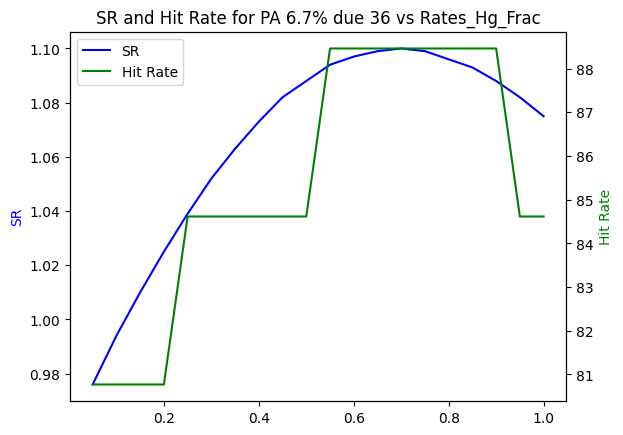

In [6]:
# ax=plt.plot(l, sr_list, label='SR')
# ax.plot(l, pnl_list, label='Cum P/L',secondary_y=True,ax=ax)
# plt.legend()
# plt.show()
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

# First plot on primary y-axis
ax1.plot(l, sr_list, label='SR', color='blue')
ax1.set_ylabel('SR', color='blue')

# Create secondary y-axis
ax2 = ax1.twinx()
# ax2.plot(l, pnl_list, label='Cum P/L', color='green')
# ax2.set_ylabel('Cum P/L', color='green')

ax2.plot(l, hit_list, label='Hit Rate', color='green')
ax2.set_ylabel('Hit Rate', color='green')

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='best')
plt.title('SR and Cum P/L for PA 6.7% due 36 vs Rates_Hg_Frac')
plt.title('SR and Hit Rate for PA 6.7% due 36 vs Rates_Hg_Frac')

plt.show()

In [7]:
# # bond.iloc[40:]
# rates.iloc[40:]['Rates_Hg'].apply(lambda x: eval(str(x)[2:])).plot()
# plt.ylabel('CT used')
# plt.xlabel('Date of trade entry')
# plt.title('CT used vs. time')
# plt.show()

<Axes: xlabel='Date'>

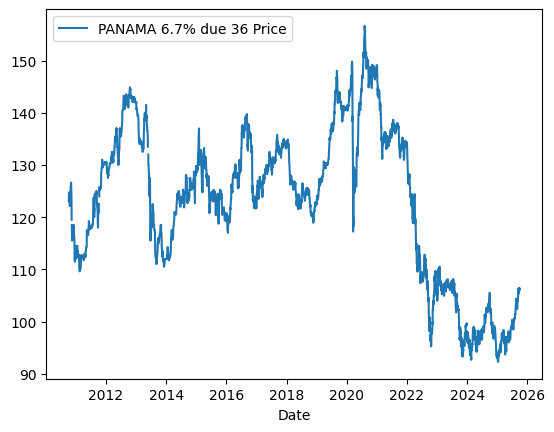

In [8]:
dq[['PANAMA 6.7% due 36 Price']].plot()

In [9]:

#                 ###########################################################################################################################

#                 sr = bt_df.copy()
#                 sr['Sum'] = sr.sum(axis=1)
#                 sr = sr[['Sum']]
#                 sr = sr.cumsum().resample("D").last().dropna().copy()
#                 sr += 10**7
#                 sr = sr.pct_change()
#                 sr = round((252**0.5*sr.mean()/sr.std()).iloc[0],3)
                
#                 globals()[f'{global_model}_{model_num}_{trade_btdf_direction}_$pnl'].\
#                 loc[strategy_zscore_entry,strategy_zscore_exit] = round(bt_df.sum().sum(),0)
#                 globals()[f'{global_model}_{model_num}_{trade_btdf_direction}_$pnl/trade'].\
#                 loc[strategy_zscore_entry,strategy_zscore_exit] = round(bt_df.sum().sum()/trade_num,0)
#                 globals()[f'{global_model}_{model_num}_{trade_btdf_direction}_SR'].\
#                 loc[strategy_zscore_entry,strategy_zscore_exit] = round(sr,2)
#                 globals()[f'{global_model}_{model_num}_{trade_btdf_direction}_trades'].\
#                 loc[strategy_zscore_entry,strategy_zscore_exit] = trade_num

#                 bt_df['Sum'] = bt_df.sum(axis=1)
#                 pos = len(bt_df[bt_df['Sum']>0])
#                 neg = len(bt_df[bt_df['Sum']<0])
#                 try:
#                     hit = round((pos/(pos+neg))*100,0)
#                 except:
#                     hit = 0
#                 globals()[f'{global_model}_{model_num}_{trade_btdf_direction}_Hit Ratio'].\
#                 loc[strategy_zscore_entry,strategy_zscore_exit] = round(hit,0)
    
#                 max_dd = bt_df[['Sum']].cumsum().copy()
#                 max_dd['Roll Max'] = max_dd[['Sum']].rolling(window=10000000, min_periods=1).max()
#                 max_dd['Diff'] = abs(max_dd['Roll Max'] - max_dd['Sum'])
#                 globals()[f'{global_model}_{model_num}_{trade_btdf_direction}_max DD'].\
#                 loc[strategy_zscore_entry,strategy_zscore_exit] = round(-1*max_dd['Diff'].max(),0)
                
#                 ############################### Plots
                
#                 dates3, values3 = zip(*strat1.scatter_plot_trade_pnl)
#                 d3 = pd.DataFrame({ 'CDX':list(values3)}, index = list(dates3))
#                 dates3, values3 = zip(*strat2.scatter_plot_trade_pnl)
#                 d4 = pd.DataFrame({ 'SPX':list(values3)}, index = list(dates3))
    
#                 if len(model_X) == 1:
#                     d5 = pd.concat([d3,d4],axis=1).dropna().copy()
    
#                 elif len(model_X) == 2:
#                     dates3, values3 = zip(*strat3.scatter_plot_trade_pnl)
#                     d41 = pd.DataFrame({ 'SPX2':list(values3)}, index = list(dates3))
#                     d5 = pd.concat([d3,d4,d41],axis=1).dropna().copy()
                
#                 scatter = pd.concat([bt_df[['Sum']],d5['CDX']],axis=1)
#                 # scatter = pd.concat([bt_df[['Sum']],d3['CDX']],axis=1)
#                 x = scatter[scatter['Sum']!=0.0]['CDX'].copy()
#                 bar_size = sampling_multiplier if dict_models[model_num][0] == 'Intraday' else np.nan
                
#                 globals()[f'{global_model}_{model_num}_{trade_btdf_direction}_days/trade'].\
#                 loc[strategy_zscore_entry,strategy_zscore_exit] = round(x.sum()/(bar_size*len(x)),1)
                
#                 title = f"{global_model}; Model {dict_models[model_num][-1]}; {strategy_zscore_entry} entry; {trade_btdf_direction} direction"
#                 title += f" & {strategy_zscore_exit} exit; P/L: {bt_df[['Sum']].cumsum().iloc[-1,0]:.0f}; SR: {sr:.2f}"
#                 title += f" & Diff: {str(diff_period_list)}"
                
#                 dates3, values3 = zip(*strat1.scatter_plot_trade_pnl)
#                 d3 = pd.DataFrame({ 'CDX':list(values3)}, index = list(dates3))
#                 dates3, values3 = zip(*strat2.scatter_plot_trade_pnl)
#                 d4 = pd.DataFrame({ 'SPX':list(values3)}, index = list(dates3))
                
#                 if (model_X) == 1:
#                     d5 = pd.concat([d3,d4],axis=1).dropna().copy()
    
#                 elif len(model_X) == 2:
#                     dates3, values3 = zip(*strat3.scatter_plot_trade_pnl)
#                     d41 = pd.DataFrame({ 'SPX2':list(values3)}, index = list(dates3))
#                     d5 = pd.concat([d3,d4,d41],axis=1).dropna().copy()
                
#                 d5 = d5/bar_size
#                 scatter = pd.concat([bt_df[['Sum']],d5['CDX']],axis=1)
#                 scatter = scatter[scatter['Sum']!=0.0]
#                 plt.figure(figsize=(12,6))
#                 plt.scatter(scatter['CDX'], scatter['Sum'],label="Per Trade P/L")
#                 plt.ylabel("Trade $P/L")
#                 plt.xlabel("Trade Duration in Days")
#                 plt.title(title)
#                 plt.legend()
#                 plt.savefig(f"Plots/Scatter/{title.replace(";","_").replace("/","_").replace("&","_").replace(":","_")}.png")
#                 # plt.show()
#                 plt.close()
                 
#                 bt_df['Sum'].cumsum().plot(label="Cum. P/L", figsize=(12,6))
#                 plt.title(title)
#                 plt.legend()
#                 plt.savefig(f"Plots/PL/{title.replace(";","_").replace("/","_").replace("&","_").replace(":","_")}.png")
#                 # plt.show()
#                 plt.close()
#                 ############################### Plots


# display(dfx.iloc[[0,-1],:])

# for trade_btdf_direction in ['Long/Short']: #'Long','Short',
#     print(f'global model is {global_model}')
#     print(f'model_num is {model_num}')
#     print(f'trade direction is {trade_btdf_direction}')
#     for info in ['$pnl','$pnl/trade','SR','Hit Ratio','trades','days/trade','max DD']:
#         display(globals()[f'{global_model}_{model_num}_{trade_btdf_direction}_{info}'])